In [3]:
!pip install -q kagglehub scikit-learn pandas matplotlib seaborn


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rashadrmammadov/customer-churn-dataset")

print("Path to dataset files:", path)


100%|██████████| 119k/119k [00:00<00:00, 42.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rashadrmammadov/customer-churn-dataset/versions/1


In [7]:
import os

# Check if path is correct and list all files
print("Dataset path:", path)
print("Files:", os.listdir(path))


Dataset path: /root/.cache/kagglehub/datasets/rashadrmammadov/customer-churn-dataset/versions/1
Files: ['customer_churn_data.csv']


In [16]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
# ✅ Step 1: Load the dataset
import os
csv_path = os.path.join(path, "customer_churn_data.csv")
df = pd.read_csv(csv_path)

In [18]:
# 🔎 Step 2: Explore dataset
print(df.info())        # Check data types and missing values
print(df.head())        # Preview first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [23]:
# 🧠 Step 4: Convert target variable 'Churn' to numeric
# 'Yes' → 1, 'No' → 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [24]:
# 🔄 Step 5: One-hot encode all remaining categorical columns
# Identify object-type columns (categorical)
categorical_cols = df.select_dtypes(include='object').columns

# Create dummy variables and drop first category to avoid dummy trap
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [25]:
# 🎯 Step 6: Define features (X) and target (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target


In [26]:
# 🔀 Step 7: Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
# 🤖 Step 8: Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
# 🔍 Step 9: Predict and evaluate the model
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.55      0.52       584
           1       0.50      0.44      0.47       592

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.50      1176
weighted avg       0.50      0.50      0.50      1176



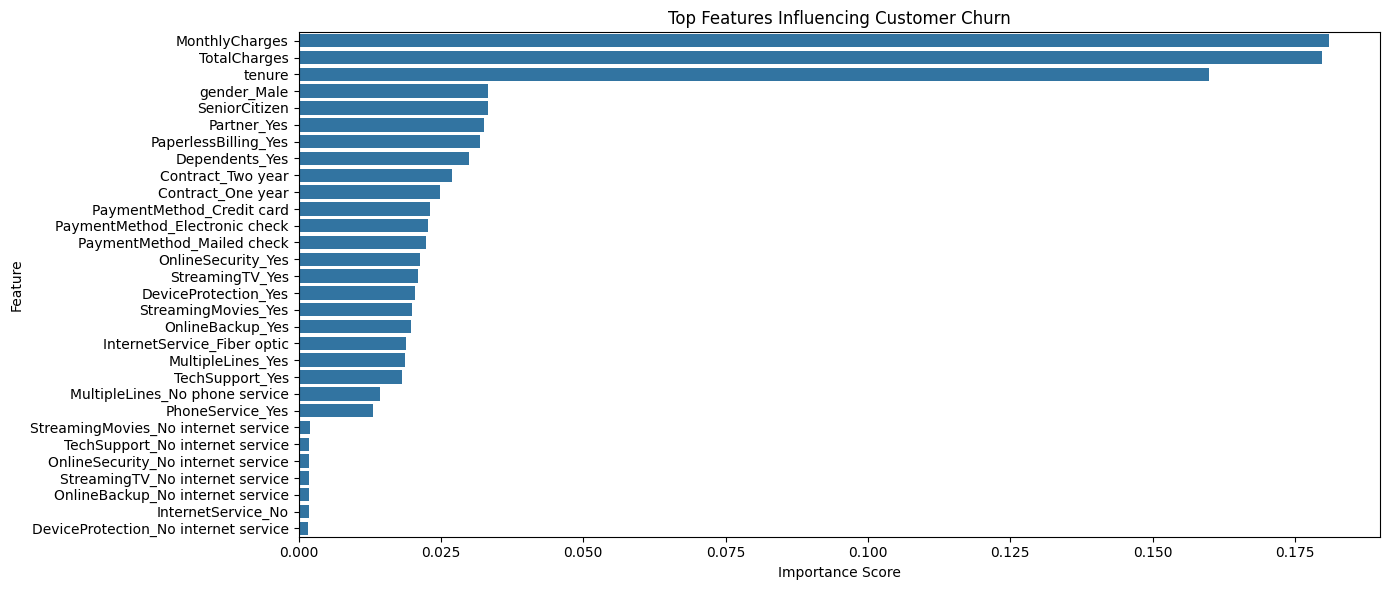

In [37]:
# 📊 Step 10: Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get importance scores and sort
importances = model.feature_importances_
features = np.array(X.columns)
indices = importances.argsort()[::-1]

# Plot the top features
plt.figure(figsize=(14, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Top Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
